### Bit Coin Price Prediction 


Project description: 
- Preprocess data: explore data, address missing data, categorical data, if there is any, and data scaling. Justify the type of scaling used in this project. 
- Train dataset using all the linear regression models. Use Grid Search to find the best scaling parameter. Use plots and graphs to help get a better glimpse of the results. 
- Then use cross validation to find average training and testing score.

### 1. Read data as data frame

In [1]:
import pandas as pd
data=pd.read_csv('bitcoin_dataset.csv')
test=pd.read_csv('test_set.csv')

### 2. Preprocess data

### (1) Explore Data & Imputation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
%matplotlib inline

In [3]:
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010 0:00,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010 0:00,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010 0:00,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010 0:00,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010 0:00,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [4]:
data.shape

(2906, 24)

In [5]:
test.head()

,Date,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/1/2018 0:00,16839687.5,1.529590e+11,1.509688e+09,154613.2244,1.053963,0,1610.400000,12.475000,20703947.91,...,0.799509,78.049647,591550,257664,296946448,249466,179686,2.190613e+06,276923.3207,2.515366e+09
1,2/2/2018 0:00,16841787.5,1.499240e+11,2.213437e+09,154785.0008,1.022479,0,1404.273810,11.225000,21739145.31,...,0.717894,89.591902,551198,235918,297182366,229894,155128,1.460796e+06,330740.2192,2.944217e+09
2,2/3/2018 0:00,16843762.5,1.528850e+11,9.524038e+08,154942.4583,0.996567,0,1233.487342,10.475000,20445148.56,...,1.290914,98.824757,436196,194891,297377257,184856,131568,9.100425e+05,164374.0244,1.491970e+09
3,2/4/2018 0:00,16845987.5,1.415170e+11,1.080683e+09,155118.7652,0.990488,0,975.769663,9.275000,23033142.05,...,1.208997,112.999677,396694,173687,297550944,165753,125143,9.722485e+05,193244.2140,1.623377e+09
4,2/5/2018 0:00,16848300.0,1.152220e+11,1.793319e+09,155322.7709,1.102733,0,1169.529730,6.133333,23938939.78,...,0.967008,78.586115,486553,216363,297767307,208757,144850,1.848913e+06,257109.2993,1.758323e+09


In [6]:
test.shape

(14, 23)

#### No Categorical Data

In [7]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
Date                                                   2906 non-null object
btc_market_price                                       2906 non-null float64
btc_total_bitcoins                                     2879 non-null float64
btc_market_cap                                         2906 non-null float64
btc_trade_volume                                       2885 non-null float64
btc_blocks_size                                        2877 non-null float64
btc_avg_block_size                                     2906 non-null float64
btc_n_orphaned_blocks                                  2906 non-null int64
btc_n_transactions_per_block                           2906 non-null float64
btc_median_confirmation_time                           2894 non-null float64
btc_hash_rate                                          2906 non-null float64
btc_difficulty                                   

In [8]:
miss_total = data.isnull().sum().sort_values(ascending=False)
miss_percent=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
miss_data = pd.concat([miss_total, miss_percent], axis=1, keys=['Total', 'Percent'])
miss_data

,Total,Percent
btc_blocks_size,29,0.009979
btc_total_bitcoins,27,0.009291
btc_trade_volume,21,0.007226
btc_difficulty,16,0.005506
btc_median_confirmation_time,12,0.004129
btc_transaction_fees,10,0.003441
btc_hash_rate,0,0.000000
btc_market_price,0,0.000000
btc_market_cap,0,0.000000
btc_avg_block_size,0,0.000000


In [9]:
print("Total_miss_percent: {:.3f}".format(sum(miss_total)/len(data.index)))
#total miss observations less than 5%, so delete directly
data=data.dropna()
data.shape

Total_miss_percent: 0.040


(2791, 24)

In [10]:
data['btc_market_price'].describe()

count     2791.000000
mean       845.171457
std       2338.350774
min          0.000000
25%          6.767500
50%        235.860000
75%        591.545000
max      19498.683330
Name: btc_market_price, dtype: float64

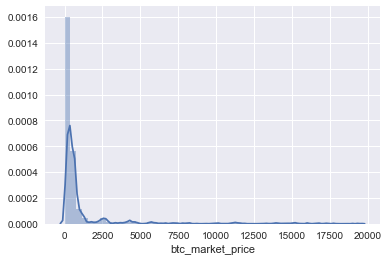

In [11]:
sns.distplot(data['btc_market_price'])

In [12]:
#skewness and kurtosis
print("Skewness: {}".format(data['btc_market_price'].skew()))
print("Kurtosis: {}".format(data['btc_market_price'].kurt()))
# It shows peakedness, positive skewness

Skewness: 4.935101207331035
Kurtosis: 26.451218783309304


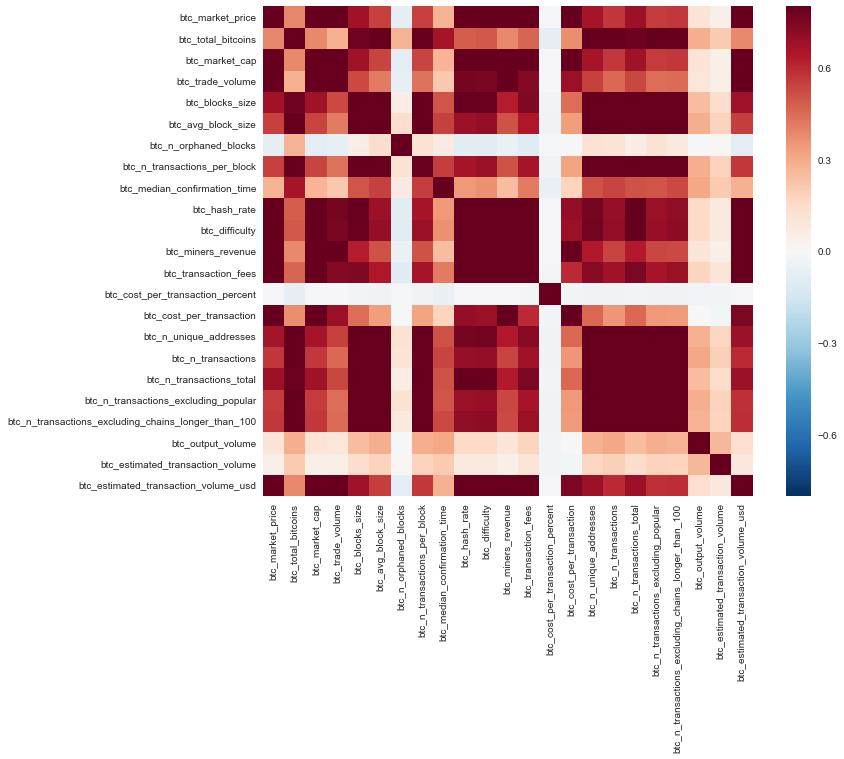

In [13]:
corrmat=data.corr()
f, ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

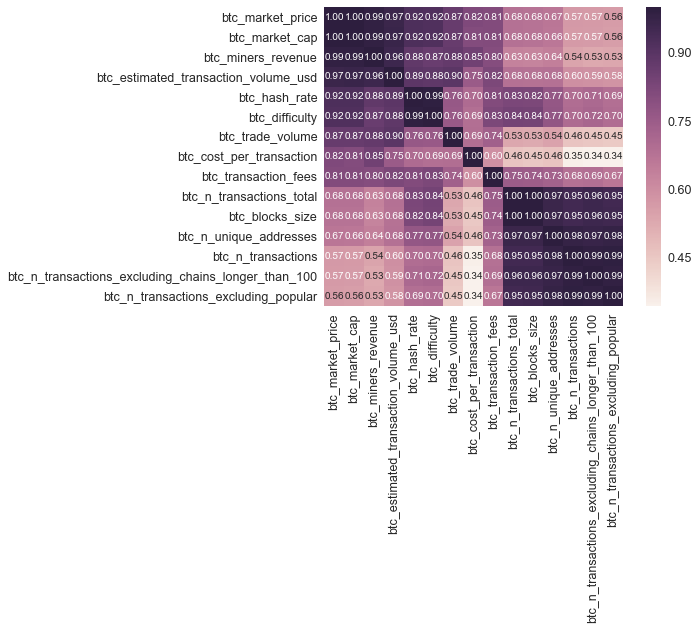

In [14]:
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'btc_market_price')['btc_market_price'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### (3) Data Scaling

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X= data.drop(['Date','btc_market_price'], axis =1)
#Chossing features according to correlation
X = X[['btc_market_cap','btc_trade_volume', 
          'btc_n_transactions_per_block','btc_median_confirmation_time',
          'btc_miners_revenue', 'btc_cost_per_transaction',
          'btc_n_unique_addresses', 'btc_output_volume', 
          'btc_estimated_transaction_volume_usd']]
y = data['btc_market_price'] 

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state=10)
scaler=StandardScaler()

X_train = scaler.fit_transform(X_train_org)
X_test=scaler.transform(X_test_org)


### 3. Model

#### (1) Linear regression  

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr=LinearRegression().fit(X_train,y_train)

print('Training score: {}'.format(lr.score(X_train, y_train)))
print('Testing score: {}'.format(lr.score(X_test,y_test)))

Training score: 0.9999240492658845
Testing score: 0.9998871707434919


#### Cross Validation

In [17]:
cv_scores=cross_val_score(lr,X_train,y_train, cv=5)
print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {}'.format(np.mean(cv_scores))) 

test_scores = {}
train_scores = {}
lr.score(X_test,y_test)
train_scores['linear regression']=[np.mean(cv_scores)]
test_scores['linear regression']=[lr.score(X_test,y_test)]

Cross-validation scores (5-fold): [ 0.99991915  0.99993209  0.99991333  0.9999156   0.99992244]
Mean cross-validation score (5-fold): 0.9999205205107036


### (2) Ridge regression

In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
param_grid = {'alpha':[0.01, 1, 5, 10, 100]}

grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {}'.format(grid_search.best_score_))

train_scores['Ridge regression']=[grid_search.best_score_]
linridge = Ridge(alpha=0.01).fit(X_test,y_test)
test_scores['Ridge regression']=[linridge.score]

Best parameters{'alpha': 0.01}
Best score 0.9999205295401178


### (3) Lasso regression

In [19]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso(max_iter = 10000)
param_grid = {'alpha':[1, 5, 10, 20, 100]}

grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {}'.format(grid_search.best_score_))

train_scores['Lasso regression']=[grid_search.best_score_]
linridge = Ridge(alpha=1).fit(X_test,y_test)
test_scores['Lasso regression']=[linridge.score]

Best parameters{'alpha': 1}
Best score 0.9999191047360277


### (4) Polynomial regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_F1_poly=X_train
X_F1_poly_test=X_test
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1_poly)
X_F1_poly_test = poly.fit_transform(X_F1_poly_test)
poly.fit(X_F1_poly,y_train)

linreg = LinearRegression().fit(X_F1_poly, y_train)
print('Polynomial LinearRegression')
print('Training score: {}'.format(linreg.score(X_F1_poly, y_train)))
print('Testing score: {}\n'.format(linreg.score(X_F1_poly_test,y_test)))


linridge = Ridge().fit(X_F1_poly, y_train)
print('Polynomial Ridge Regression')
print('Training score: {}'.format(linridge.score(X_F1_poly, y_train)))
print('Testing score: {}\n'.format(linridge.score(X_F1_poly_test,y_test)))

linlasso= Lasso().fit(X_F1_poly, y_train)
print('Polynomial Lasso Regression')
print('Training score: {}'.format(linlasso.score(X_F1_poly, y_train)))
print('Testing score: {}'.format(linlasso.score(X_F1_poly_test,y_test)))

train_scores['Polynomial LinearRegression']=[linreg.score(X_F1_poly, y_train)]
train_scores['Polynomial Ridge Regression']=[linridge.score(X_F1_poly, y_train)]
train_scores['Polynomial Lasso Regression']=[linlasso.score(X_F1_poly, y_train)]

test_scores['Polynomial LinearRegression']=[linreg.score(X_F1_poly_test,y_test)]
test_scores['Polynomial Ridge Regression']=[linridge.score(X_F1_poly_test,y_test)]
test_scores['Polynomial Lasso Regression']=[linlasso.score(X_F1_poly_test,y_test)]

Polynomial LinearRegression
Training score: 0.9999821606930607
Testing score: 0.9999623300591146

Polynomial Ridge Regression
Training score: 0.9999288613476821
Testing score: 0.9998978962072135

Polynomial Lasso Regression
Training score: 0.9999518446788537
Testing score: 0.9999286836003476


### (5) Support vector machine 

In [21]:
from sklearn.svm import SVR

#SVM without kernel
svr=SVR()
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]} 

grid_search = GridSearchCV(svr,param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [22]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {}'.format(grid_search.best_score_))

train_scores['SVM without kernel']=[grid_search.best_score_]
svr = SVR(gamma=0.01, C=1000)
svr.fit(X_train, y_train)
svr.score(X_test, y_test)
test_scores['SVM without kernel']=[svr.score(X_test, y_test)]

Best parameters{'C': 1000, 'gamma': 0.01}
Best score 0.9815156460578678


In [23]:
from sklearn.svm import SVR

#SVM with kernel 
svr=SVR()
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['sigmoid']} 

grid_search = GridSearchCV(svr,param_grid,refit=True,verbose=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .. C=0.1, gamma=1, kernel=sigmoid, score=-0.036793, total=   0.3s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .. C=0.1, gamma=1, kernel=sigmoid, score=-0.049905, total=   0.3s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] .. C=0.1, gamma=1, kernel=sigmoid, score=-0.041756, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV]  C=0.1, gamma=0.1, kernel=sigmoid, score=-0.047412, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV]  C=0.1, gamma=0.1, kernel=sigmoid, score=-0.058515, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV]  C=0.1, gamma=0.1, kernel=sigmoid, score=-0.052454, total=   0.4s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=0.1, gamma=0.01, kernel=sigmoid, score=-0.060646, total=   0.3s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=0.1, gamma=0.01, kernel=sigmoid, score=-0.070377, total=   0.3s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=0.1, gamma=0.01, kernel=sigmoid, score=-0.065504, total=   0.3s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV

[CV]  C=1000, gamma=1, kernel=sigmoid, score=-1939.720675, total=   0.4s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=-1629.096866, total=   0.4s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=-2058.026455, total=   0.3s
[CV] C=1000, gamma=0.1, kernel=sigmoid ...............................
[CV]  C=1000, gamma=0.1, kernel=sigmoid, score=-131.809157, total=   0.3s
[CV] C=1000, gamma=0.1, kernel=sigmoid ...............................
[CV]  C=1000, gamma=0.1, kernel=sigmoid, score=-142.962621, total=   0.3s
[CV] C=1000, gamma=0.1, kernel=sigmoid ...............................
[CV]  C=1000, gamma=0.1, kernel=sigmoid, score=-133.932542, total=   0.3s
[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=1000, gamma=0.01, kernel=sigmoid, score=-0.112187, total=   0.3s
[CV] C=1000, gamma=0.01, kernel=sigmoid ....................

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   43.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [24]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'C': 1000, 'gamma': 0.001, 'kernel': 'sigmoid'}
Best score 0.82


In [25]:
train_scores['SVM  kernel']=[grid_search.best_score_]
svr = SVR(kernel = 'sigmoid', gamma = 0.001, C=1000)
svr.fit(X_train, y_train)
svr.score(X_test, y_test)
test_scores['SVM with kernel']=[svr.score(X_test, y_test)]

### (6) KNN Regressor 

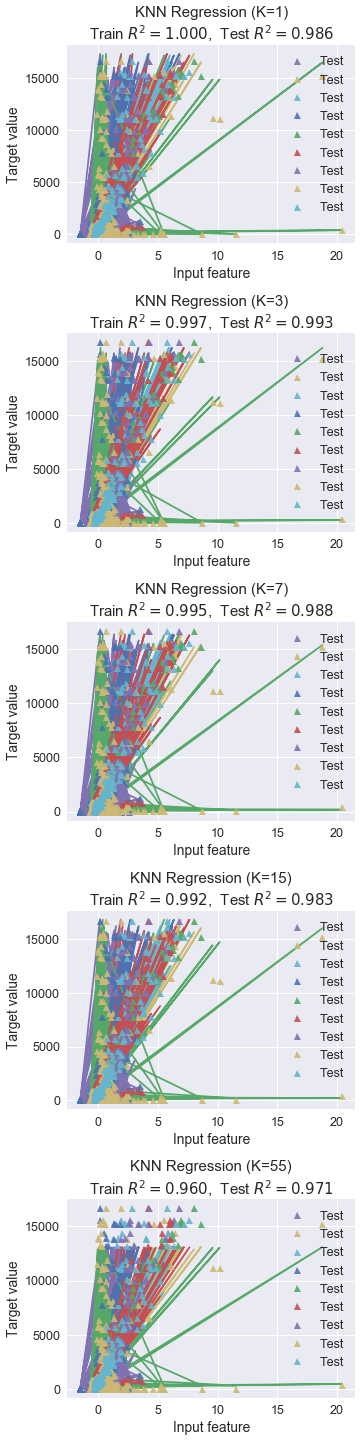

In [26]:
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor().fit(X_train,y_train)

fig, subaxes = plt.subplots(5, 1, figsize=(5,20))

#X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_test)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_test, y_predict_output)
    #thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [27]:
knnreg = KNeighborsRegressor(n_neighbors = 3).fit(X_train, y_train)
train_scores['KNN Regressor']=[knnreg.score(X_train, y_train)]
test_scores['KNN Regressor']=[knnreg.score(X_test,y_test)]

### 4. Model Evaluation

#### From above scores, we chose the Ridge regression

### 5. Prediction

In [28]:
predict_data = test.drop('Date',axis = 1)
predict_data =predict_data[['btc_market_cap','btc_trade_volume', 
          'btc_n_transactions_per_block','btc_median_confirmation_time',
          'btc_miners_revenue', 'btc_cost_per_transaction',
          'btc_n_unique_addresses', 'btc_output_volume', 
          'btc_estimated_transaction_volume_usd']]
test=scaler.transform(predict_data)
linridge = Ridge(alpha=0.01).fit(X_train,y_train)
prediction=linridge.predict(test )

In [29]:
prediction

array([ 9180.00529721,  9077.21133969,  9184.40460796,  8590.37629746,
        7000.10895428,  7852.21593475,  8179.76591418,  8337.7908744 ,
        8630.62696531,  8395.02220125,  8487.53693544,  8945.57898546,
        8705.77798155,  9481.15457024])